In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [21]:
data=pd.read_csv(r"C:\Users\Daksh\Desktop\PDS_brain_tumour\Cancer_Data.csv")

In [ ]:
data.head()
# Check if the column exists before trying to drop it
if 'Unnamed: 32' in data.columns:
    data = data.drop(columns=['Unnamed: 32'])


<bound method NDFrame.describe of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.

In [46]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [47]:
data.dtypes

id                           int64
diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

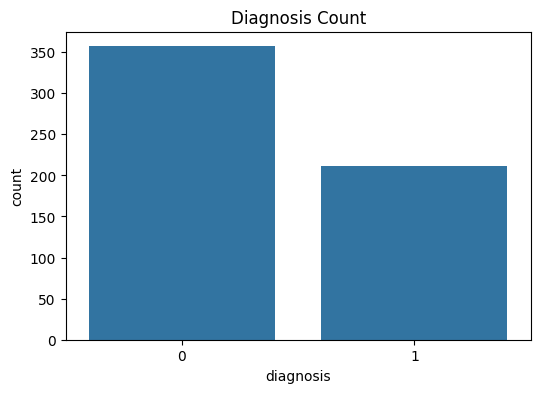

In [48]:

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='diagnosis')
plt.title('Diagnosis Count')
plt.show()

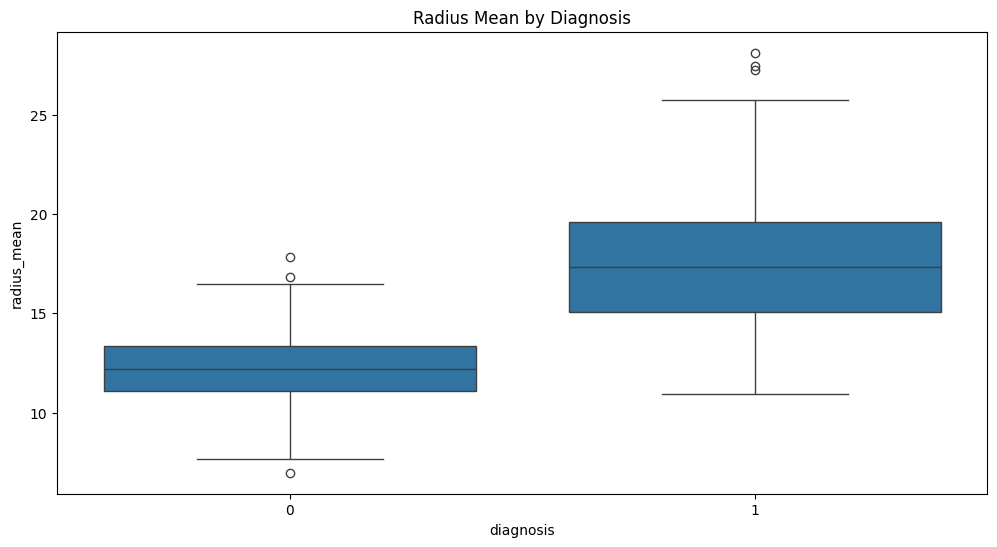

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='diagnosis', y='radius_mean')
plt.title('Radius Mean by Diagnosis')
plt.show()

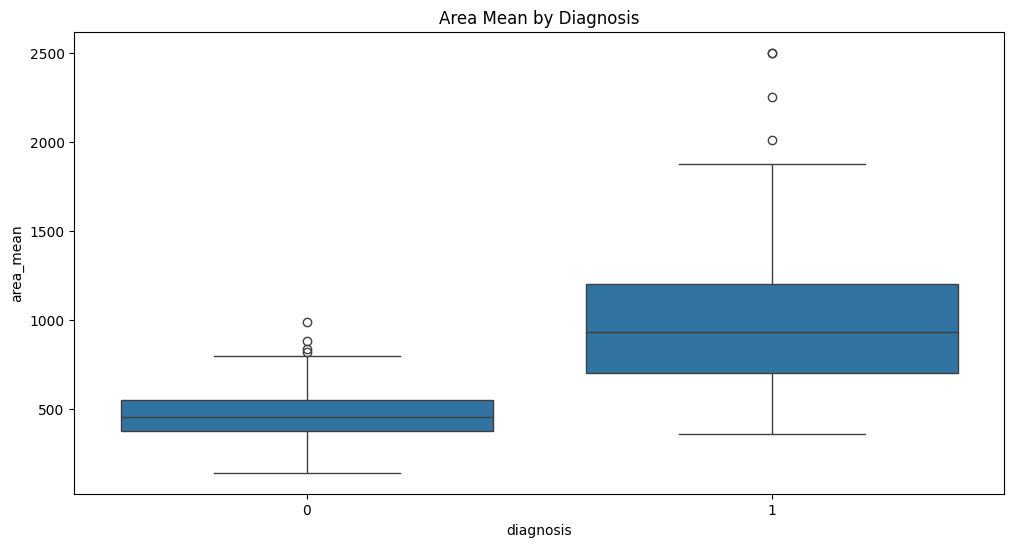

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='diagnosis', y='area_mean')
plt.title('Area Mean by Diagnosis')
plt.show()

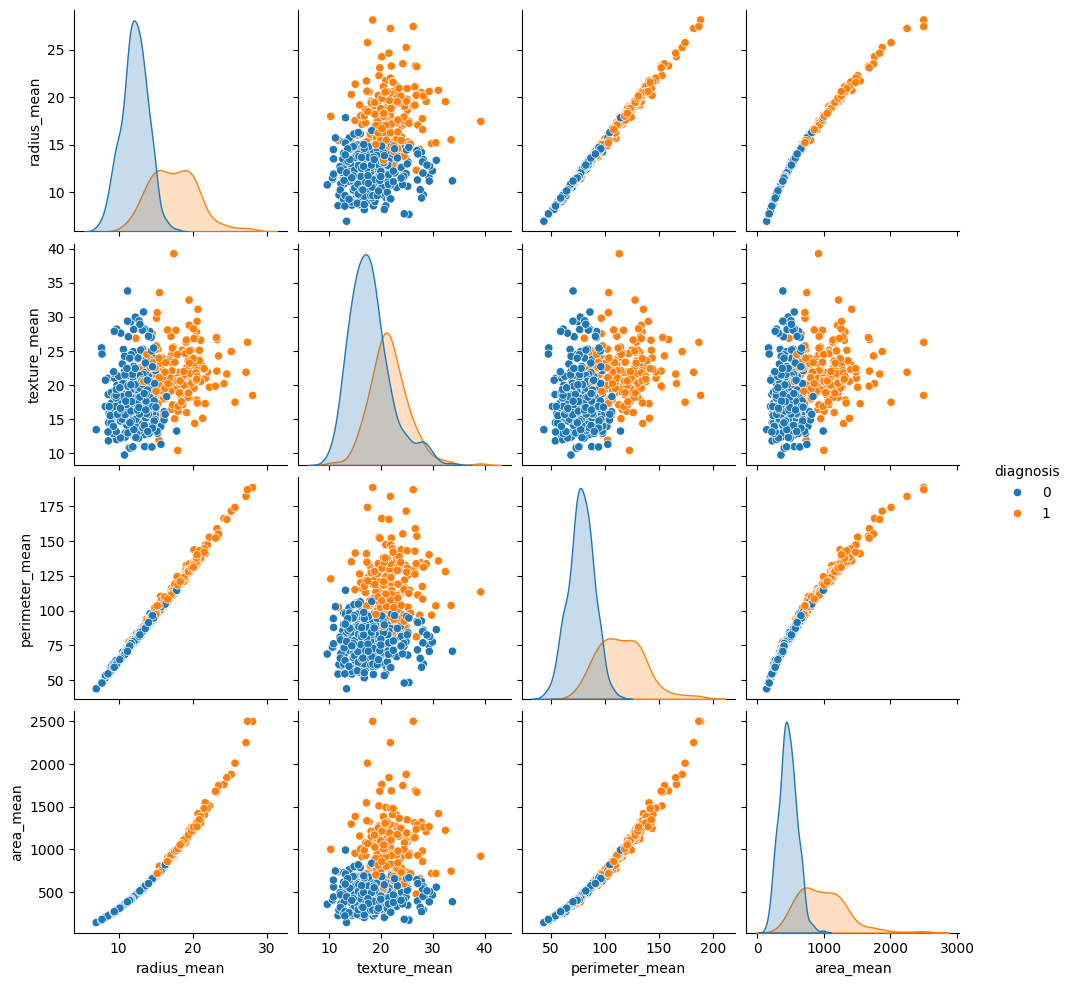

In [51]:

sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()

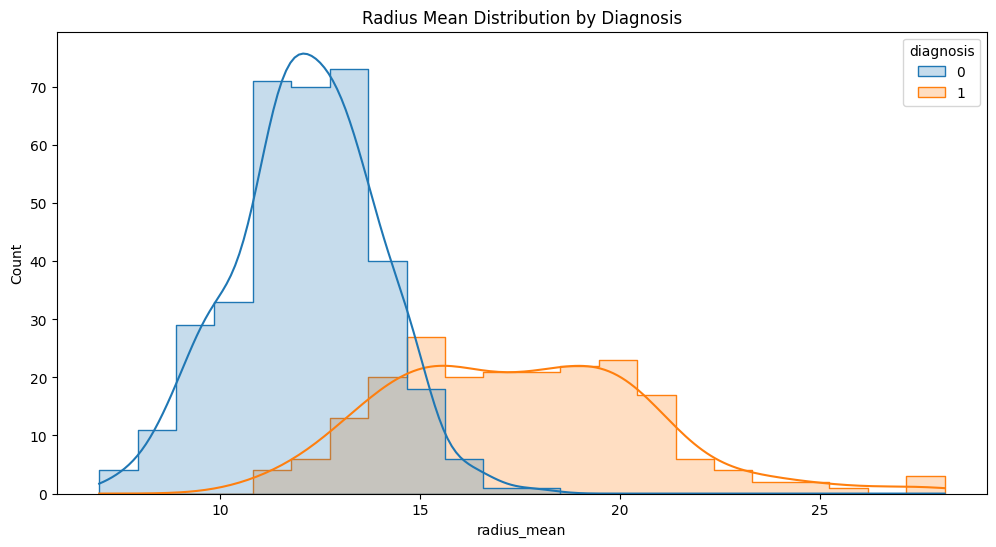

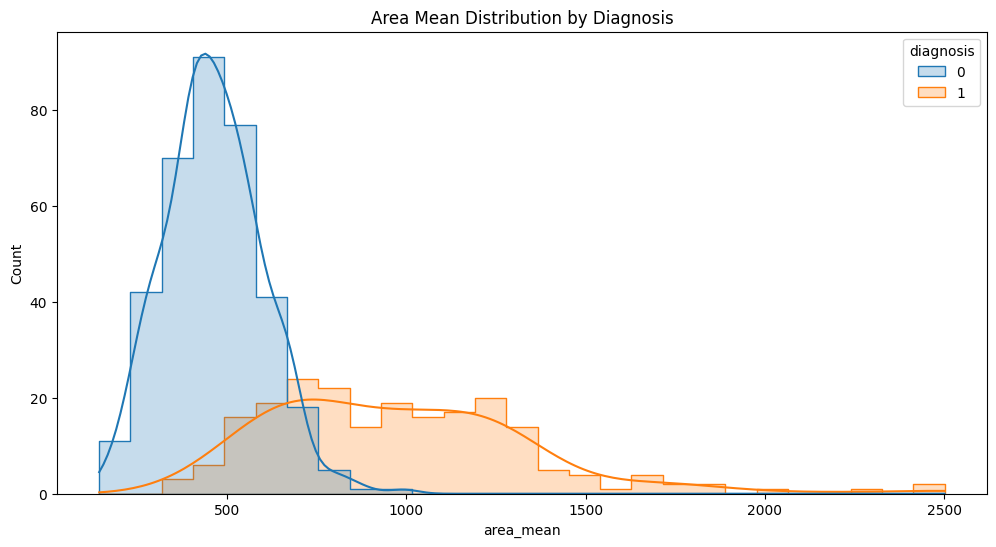

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='radius_mean', hue='diagnosis', element='step', kde=True)
plt.title('Radius Mean Distribution by Diagnosis')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='area_mean', hue='diagnosis', element='step', kde=True)
plt.title('Area Mean Distribution by Diagnosis')
plt.show()

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['diagnosis'] = le.fit_transform(data['diagnosis'])

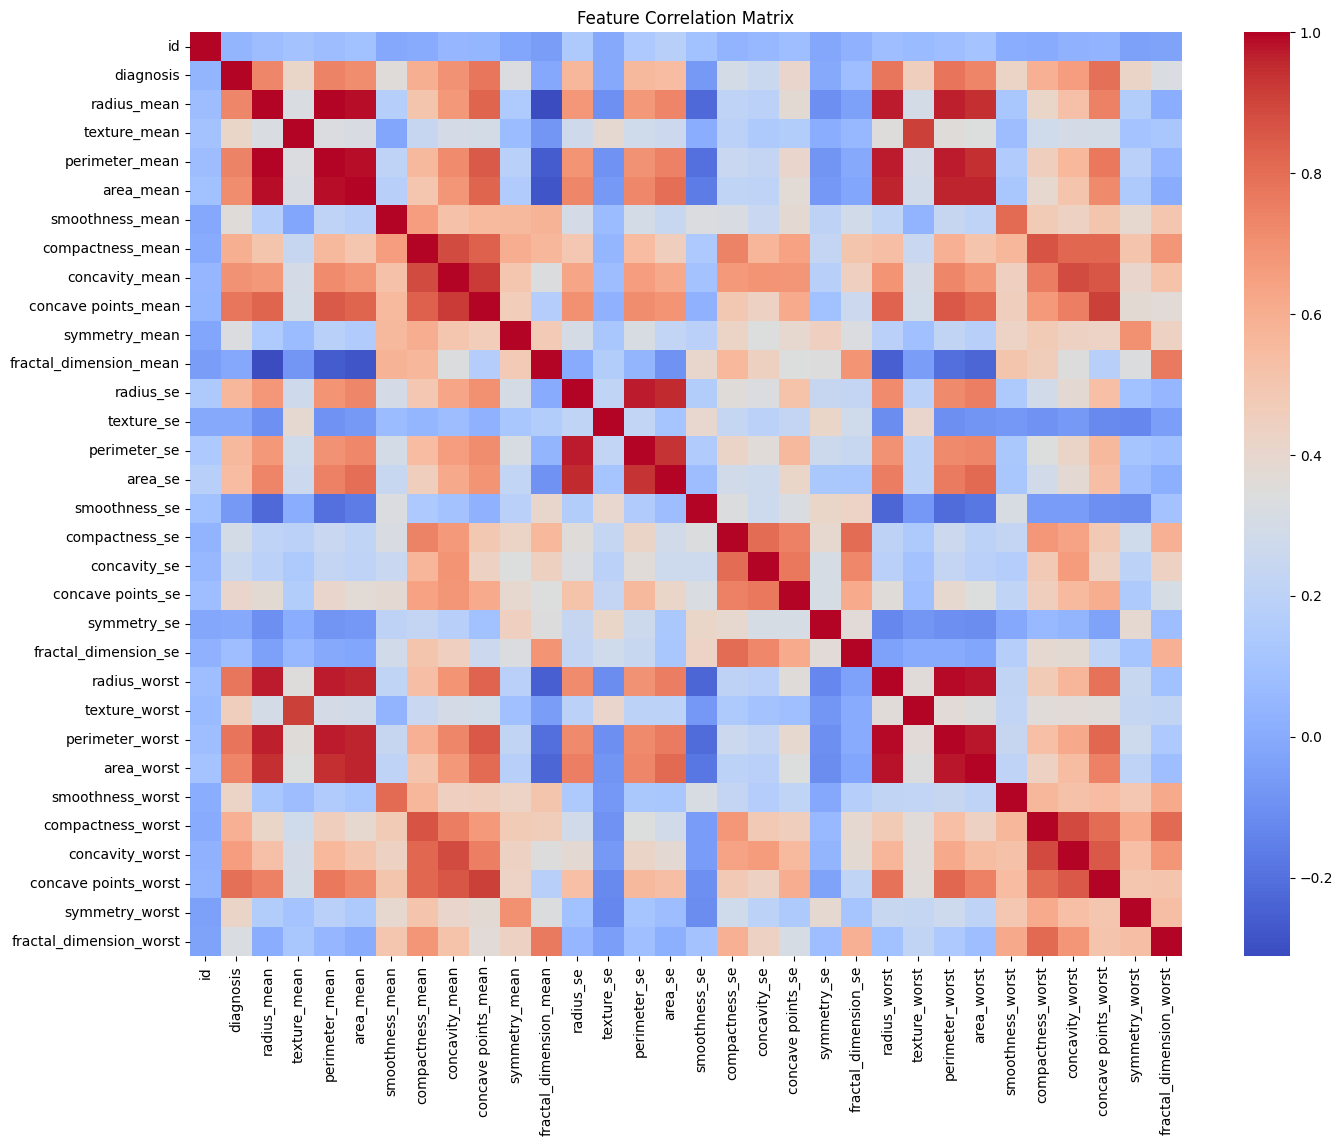

In [54]:
plt.figure(figsize=(16, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [55]:
Y=data['diagnosis']
X=data.drop(['diagnosis'],axis=1)




In [56]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X = X[(X >= lower_bound) & (X<= upper_bound)]

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)


X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())



In [58]:
import warnings

# Ignore RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [60]:
from sklearn.model_selection import GridSearchCV


# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Define hyperparameter grid with compatible solvers and penalties
param_grid = [
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'solver': ['newton-cg'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

# Initialize GridSearchCV with logistic regression model and parameter grid
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.9577291381668948


c:\Users\Daksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.62911081 0.89671683        nan        nan 0.7300684  0.94366621
        nan        nan 0.95772914 0.95532148        nan        nan
 0.9506156  0.95064295        nan        nan 0.94593707 0.94829001
        nan        nan 0.94593707 0.94593707        nan        nan
 0.89671683 0.94366621 0.95532148 0.95064295 0.94829001 0.94829001]
  warnings.warn(


In [62]:
# Retrieve best parameters
best_params = grid_search.best_params_

# Initialize a new LogisticRegression model with the best parameters
best_logreg = LogisticRegression(**best_params, max_iter=1000)

# Fit the model on the training data
best_logreg.fit(X_train, Y_train)

# Now, you can make predictions and evaluate the model
y_pred = best_logreg.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Predict on the test set
Y_pred_log = best_logreg.predict(X_test)

# Calculate metrics for multi-class classification
accuracy_log = accuracy_score(Y_test, Y_pred_log)
f1_log = f1_score(Y_test, Y_pred_log, average='weighted')  # or 'macro' for unweighted average
precision_log = precision_score(Y_test, Y_pred_log, average='weighted')  # or 'macro'
recall_log = recall_score(Y_test, Y_pred_log, average='weighted')  # or 'macro'

# Display metrics
print("Accuracy:", accuracy_log)
print("F1 Score (Weighted):", f1_log)
print("Precision (Weighted):", precision_log)
print("Recall (Weighted):", recall_log)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test, Y_pred_log)
class_report = classification_report(Y_test, Y_pred_log)

print("\nClassification Report:\n", class_report)


Accuracy: 0.9790209790209791
F1 Score (Weighted): 0.9789815468299257
Precision (Weighted): 0.9790444356482093
Recall (Weighted): 0.9790209790209791
Confusion Matrix:
 [[88  1]
 [ 2 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



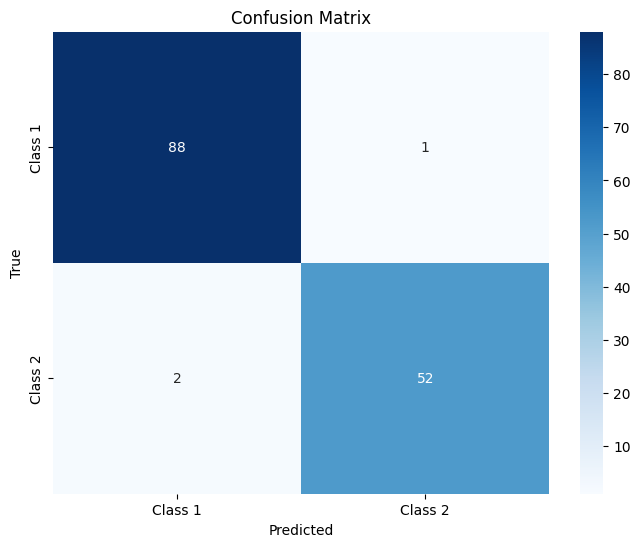

In [64]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [67]:

from sklearn.model_selection import GridSearchCV

# Initialize Random Forest model
rf = RandomForestClassifier()

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with Random Forest model and parameter grid
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, Y_train)

# Best parameters and model
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9671135430916553


In [68]:
# Use the best hyperparameters from grid search
best_rf = grid_search_rf.best_estimator_

# Fit the Random Forest model to the training data
best_rf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_rf = best_rf.predict(X_test)


# Calculate metrics
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf, average='weighted')  # Use 'weighted' for multiclass
precision_rf = precision_score(Y_test, Y_pred_rf, average='weighted')
recall_rf = recall_score(Y_test, Y_pred_rf, average='weighted')

# Display metrics
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)


Accuracy: 0.965034965034965
F1 Score: 0.9649692447165427
Precision: 0.9650041782117255
Recall: 0.965034965034965


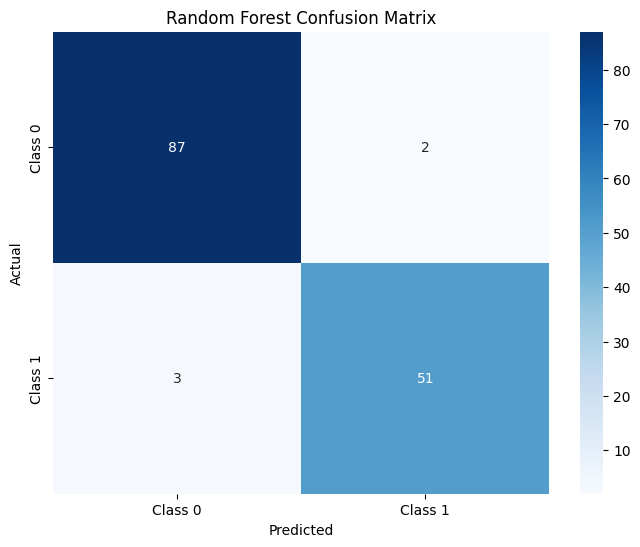

In [69]:
Y_pred_rf = best_rf.predict(X_test)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:



# Initialize Support Vector Classifier (SVC)
svc = SVC()

# Define hyperparameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'degree': [3, 4, 5],  # Degree of polynomial kernel (if using 'poly')
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'coef0': [0.0, 0.1, 0.5],  # Independent term in kernel function for 'poly' and 'sigmoid'
}

# Initialize GridSearchCV with SVC model and parameter grid
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_svc.fit(X_train, Y_train)

# Best parameters and model
print("Best Parameters:", grid_search_svc.best_params_)
print("Best Score:", grid_search_svc.best_score_)



Best Parameters: {'C': 10, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9670861833105336


In [72]:
# Get the best estimator (the model with the best parameters)
best_svc = grid_search_svc.best_estimator_

# Fit the model with the training data
best_svc.fit(X_train, Y_train)

# Now you can use `best_svc` to make predictions and evaluate the model
Y_pred_svc = best_svc.predict(X_test)

# Calculate accuracy or other metrics if needed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Accuracy:", accuracy_svc)

# Classification report
class_report_svc = classification_report(Y_test, Y_pred_svc)
print("Classification Report:\n", class_report_svc)


Accuracy: 0.958041958041958
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.93      0.96      0.95        54

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



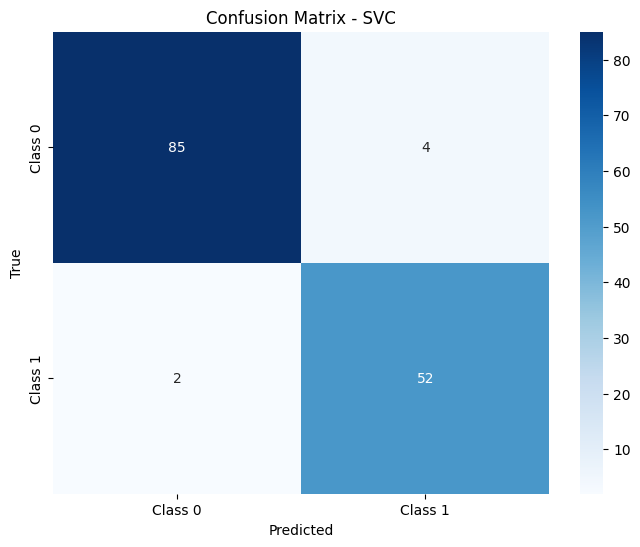

In [73]:
conf_matrix_svc = confusion_matrix(Y_test, Y_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - SVC")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [74]:
import joblib

# Save all models
joblib.dump(best_logreg, 'logistic_model.joblib')
joblib.dump(best_rf, 'forest_model.joblib')
joblib.dump(best_svc, 'svc_model.joblib')

# Load the desired model later
loaded_model_rf = joblib.load('forest_model.joblib')
loaded_model_lr = joblib.load('logistic_model.joblib')
loaded_model_svm = joblib.load('svc_model.joblib')
